In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [1]:
df = pd.read_csv('Train.csv')
df.head()

NameError: name 'pd' is not defined

In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
for col in cat_col:
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64



In [13]:
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [17]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [18]:
df['Item_Weight'].isnull().sum()

0

In [19]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [21]:
df['Outlet_Size'].isnull().sum()

0

In [22]:
sum(df['Item_Visibility']==0)

526

In [23]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [24]:
sum(df['Item_Visibility']==0)

0

In [25]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [108]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,False,False,True,False,True,False,False,False,False,True


In [106]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,14,9,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.92,0.019278,14,48.2692,4,3,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,17.50,0.016760,10,141.6180,14,9,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.20,0.066132,6,182.0950,15,0,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
4,8.93,0.066132,9,53.8614,26,1,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True


In [27]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [28]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [29]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [30]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


<Axes: xlabel='Item_Weight', ylabel='Density'>

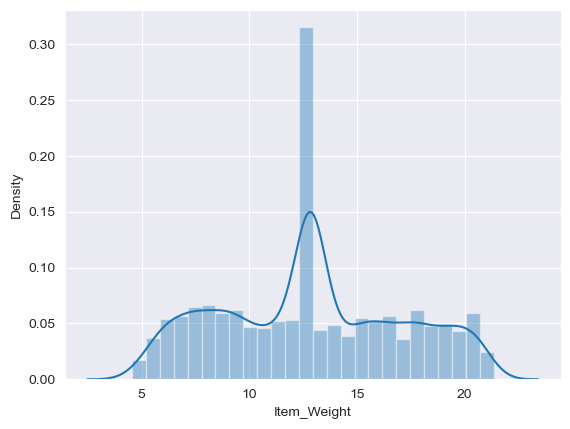

In [32]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

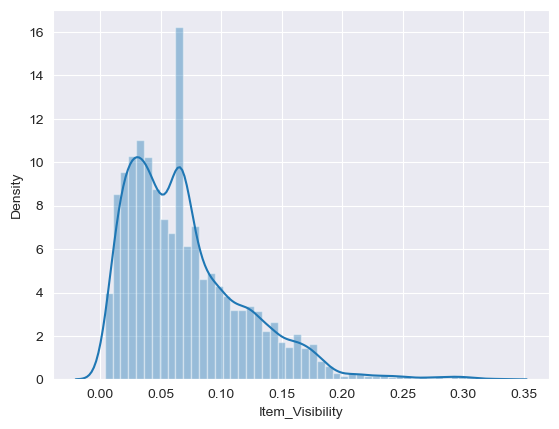

In [33]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

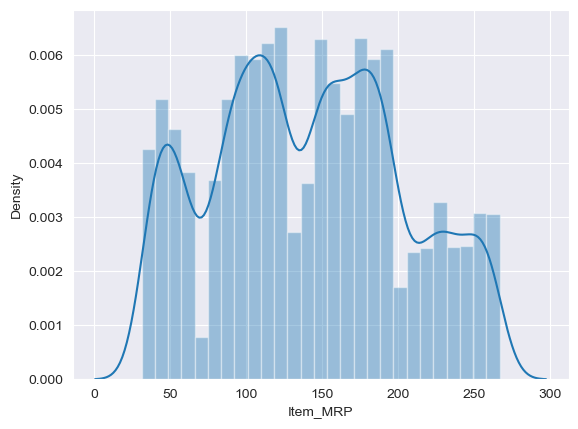

In [34]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

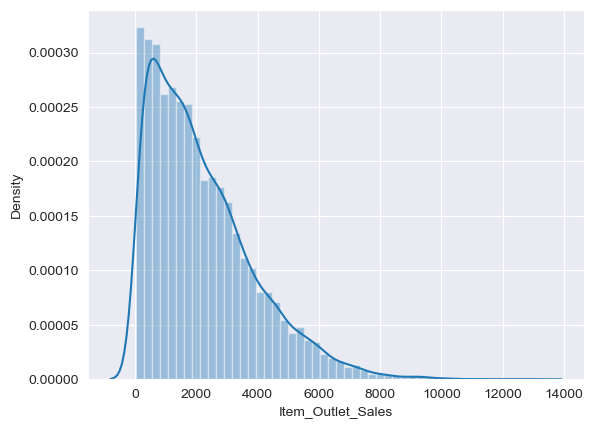

In [35]:
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

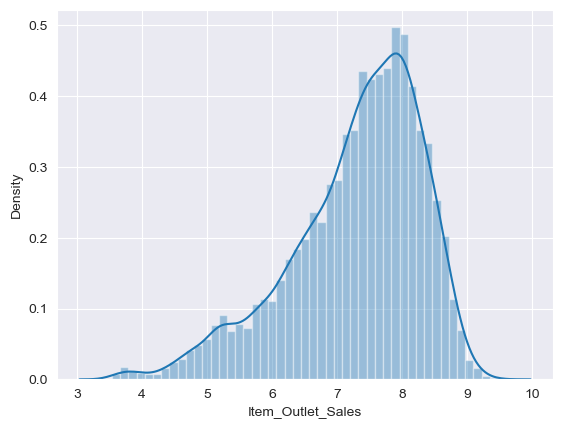

In [36]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

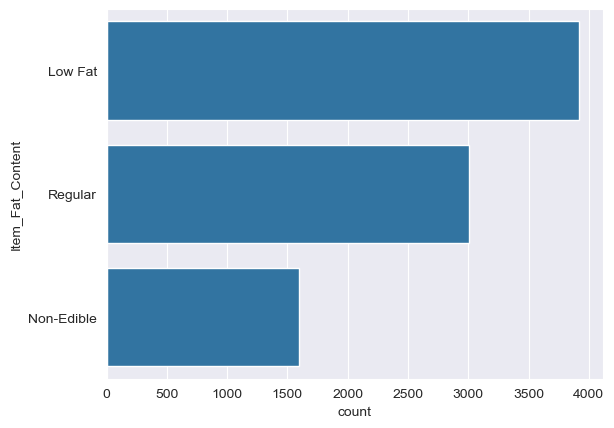

In [37]:
sns.countplot(df["Item_Fat_Content"])

[Text(0.0, 0, 'Dairy'),
 Text(200.0, 0, 'Soft Drinks'),
 Text(400.0, 0, 'Meat'),
 Text(600.0, 0, 'Fruits and Vegetables'),
 Text(800.0, 0, 'Household'),
 Text(1000.0, 0, 'Baking Goods'),
 Text(1200.0, 0, 'Snack Foods'),
 Text(1400.0, 0, 'Frozen Foods')]

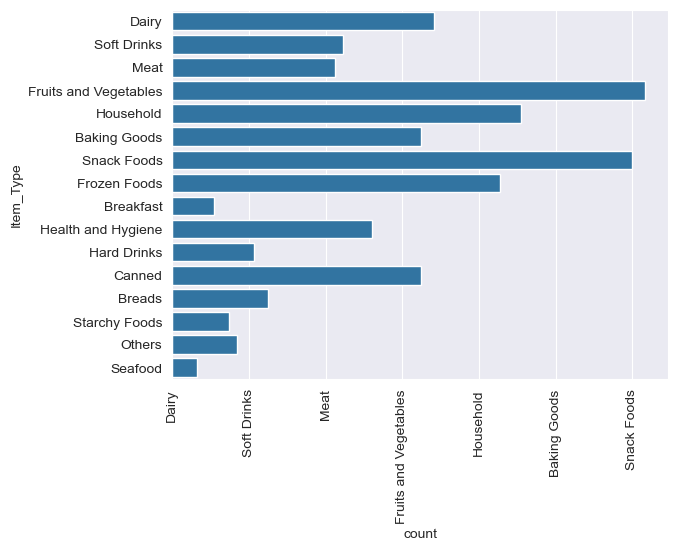

In [38]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

In [44]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

<Axes: ylabel='count'>

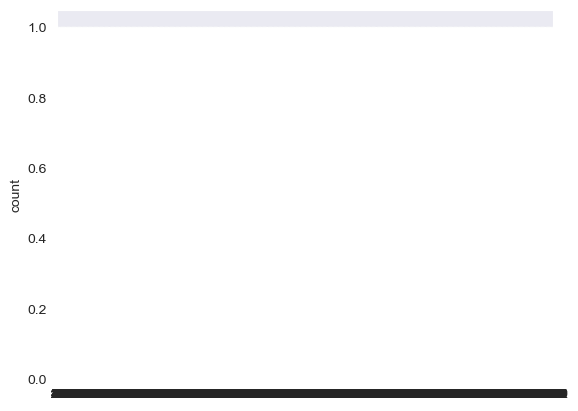

In [39]:
sns.countplot(df['Outlet_Establishment_Year'])

<Axes: xlabel='count', ylabel='Outlet_Size'>

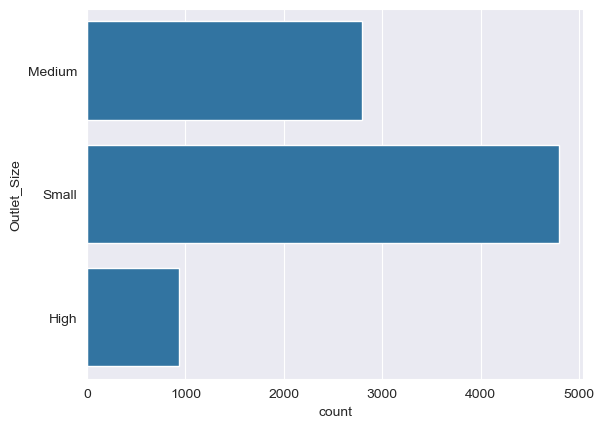

In [40]:
sns.countplot(df['Outlet_Size'])

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

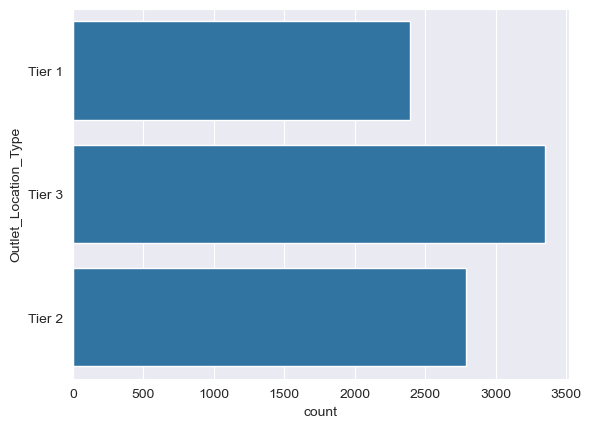

In [41]:
sns.countplot(df['Outlet_Location_Type'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

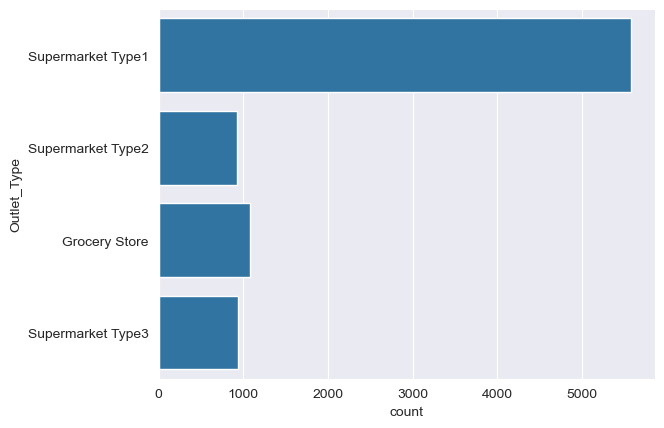

In [42]:
sns.countplot(df['Outlet_Type'])

<Axes: >

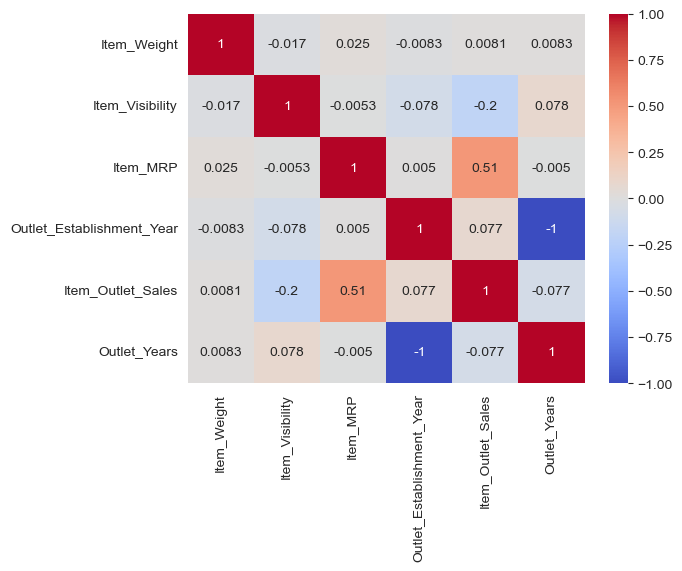

In [45]:
numeric_df = df.select_dtypes(include='number')
# Calculate the correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [48]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,False,False,True,False,True,False,False,False,False,True


In [49]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # train the model
    model.fit(X, y)

    # predict the training set
    pred = model.predict(X)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    r2_cv_score = cross_val_score(model, X, y, scoring='r2',cv=5)
    r2_cv_score = np.mean(r2_cv_score)


    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("R2: ",r2_score(y, pred))
    print("CV Score:", cv_score)
    print("R2_cv: ",r2_cv_score)

In [79]:
df.shape

(8523, 26)

Model Report
MSE: 0.28800650325017957
R2:  0.7205267398812387
CV Score: 0.2891182742641595
R2_cv:  0.7189880181942809


<Axes: title={'center': 'Model Coefficients'}>

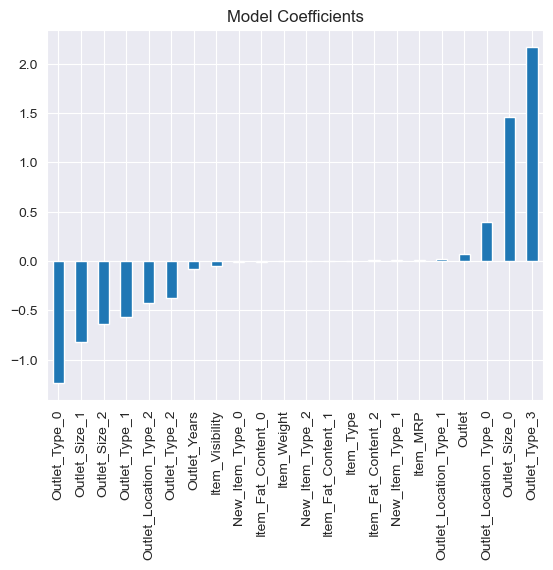

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.28819193455948555
R2:  0.7203468026508115
CV Score: 0.28930042565084374
R2_cv:  0.7188072327344844


<Axes: title={'center': 'Model Coefficients'}>

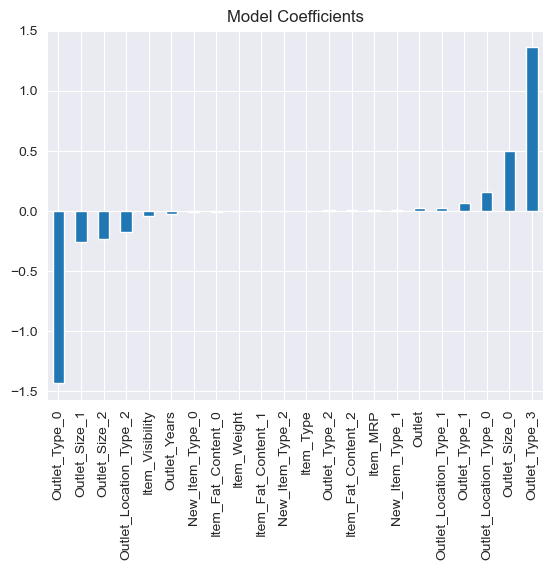

In [68]:
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102086
R2:  0.2597339047834789
CV Score: 0.7630789166281843
R2_cv:  0.2592618151206076


<Axes: title={'center': 'Model Coefficients'}>

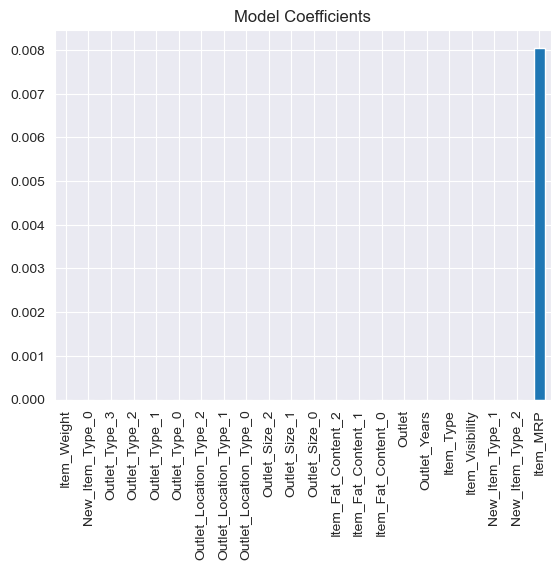

In [69]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 5.5534030638578795e-34
R2:  1.0
CV Score: 0.5827677853382472
R2_cv:  0.4371717132920837


<Axes: title={'center': 'Feature Importance'}>

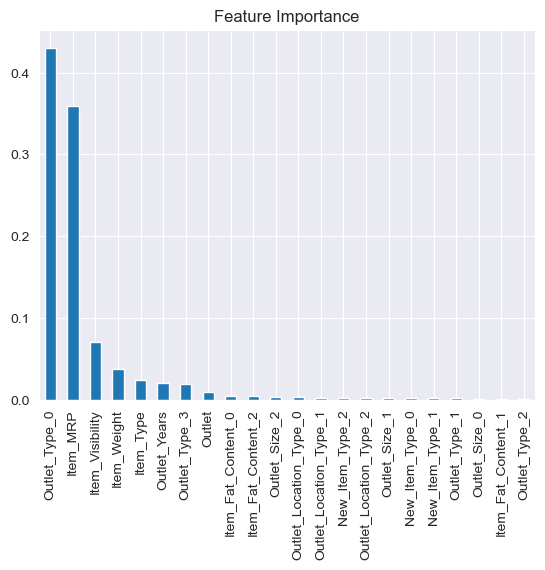

In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.04256530787514944
R2:  0.9586958446230176
CV Score: 0.3098627788602289
R2_cv:  0.699285760732134


<Axes: title={'center': 'Feature Importance'}>

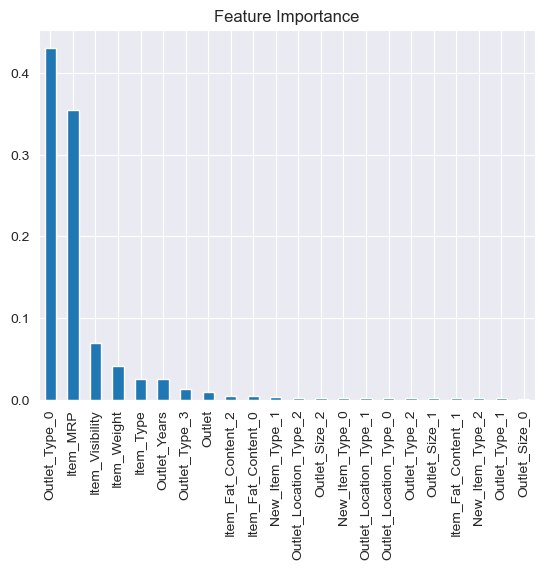

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 1.0418489584965893e-28
R2:  1.0
CV Score: 0.332545988831378
R2_cv:  0.6771015014487538


<Axes: title={'center': 'Feature Importance'}>

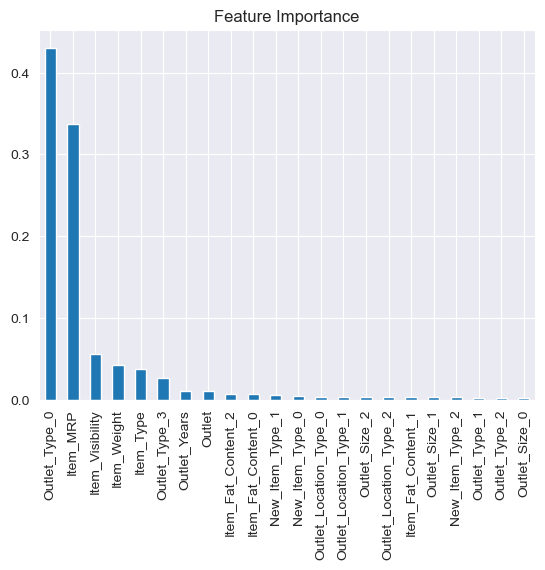

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [73]:
import xgboost as xgb

Model Report
MSE: 0.11665013946545565
R2:  0.8868060463850004
CV Score: 0.32431932572556066
R2_cv:  0.6848145911391226


<Axes: title={'center': 'Feature Importance'}>

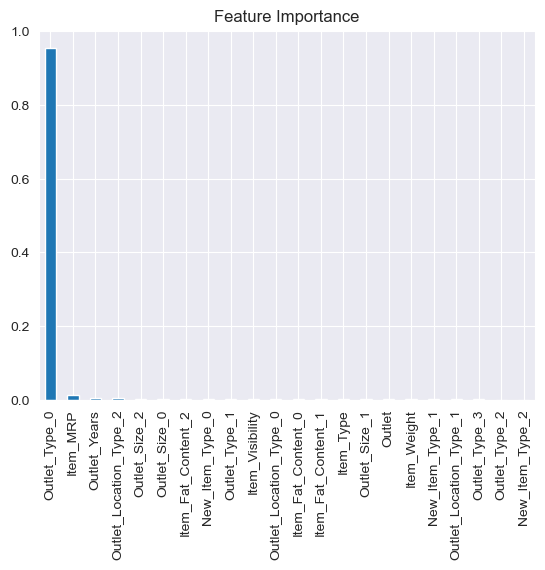

In [74]:
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [78]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Years', 'Outlet', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'New_Item_Type_0', 'New_Item_Type_1',
       'New_Item_Type_2'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [81]:
xgb_reg = xgb.XGBRegressor()

In [94]:
param_grid = {
    'n_estimators': [50, 55, 60,65],          # Number of trees
    'learning_rate': [0.08, 0.1, 0.12],       # Step size shrinkage
    'max_depth': [3, 4, 5],                  # Maximum depth of trees
    'subsample': [0.8, 1.0],                 # Subsampling ratio of the training instance
    'colsample_bytree': [0.8, 1.0]           # Subsampling ratio of columns when constructing each tree
}

# Set up GridSearchCV with XGBoost Regressor
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='r2', cv=3,
                           verbose=1, n_jobs=-1)


In [95]:
grid_search.fit(X, y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 55, 60, 65],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [96]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (neg MSE): ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60, 'subsample': 0.8}
Best score (neg MSE):  0.7376702357279346


In [97]:
rf_reg = RandomForestRegressor()

In [102]:
param_grid = {
    'n_estimators': [100, 200, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of a tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],               # Whether to use bootstrapping
}

# Set up GridSearchCV with RandomForest Regressor
grid_search2 = GridSearchCV(estimator=rf_reg, param_grid=param_grid,
                           scoring='r2', cv=5,
                           verbose=1, n_jobs=-1)

In [103]:
grid_search2.fit(X, y)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [150, 200, 250]},
             scoring='r2', verbose=1)

In [104]:
print("Best parameters found: ", grid_search2.best_params_)
print("Best score (neg MSE): ", grid_search2.best_score_)

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 150}
Best score (neg MSE):  0.7210511940815665


In [109]:
best_model = grid_search.best_estimator_

In [111]:
xgb_reg.pr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [112]:
y_pred = best_model.predict(X)

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(y,y_pred)

0.2598438841251015